In [1]:
### Introduction where you discuss the business problem and who would be interested in this project.
##If someone wishes to start a new bussiness in food and beverages and  

### Data where you describe the data that will be used to solve the problem and the source of the data.

### Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

### Results section where you discuss the results.

### Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.

### Conclusion section where you conclude the report.


In [2]:
#  Import the required Libaraires

import requests as requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files
import requests # library to handle requests
from bs4 import BeautifulSoup # for web scrapping
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopy.geocoders as geocoder
import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
print('Import complete.')

Import complete.


In [3]:
df = pd.read_csv('uae.csv')
# df.head() # For a quick check of headers displayed properly

,Neighborhood,Latitude,Longtitude,Boroughs
0,1st-Auto,25.2239,55.3512,Abu Dhabi
1,23 Marina,25.0897,55.1507,Abu Dhabi
2,Abu al Abyad,24.1924,53.7732,Abu Dhabi
3,Abu Dhabi,24.4667,54.3667,Abu Dhabi
4,Abu Dhabi International Airport AUH),24.4329,54.6445,Abu Dhabi


In [4]:
# Check the value count 

df.Boroughs.value_counts() # For a quick check of Value counts

Abu Dhabi                      55
Dubai                          28
Ras Al Khaimah                 15
Fujairah                        9
Sharjah                         9
Umm al-Quwain                   4
Ajman                           4
Ras al Khaimah                  3
Al Khabaisi                     1
Marjan Island                   1
Al Hosn                         1
Ras Al Khaimah and Fujairah     1
Al Gharbia                      1
Name: Boroughs, dtype: int64

In [5]:
# segmenting boroughs in 3 categories( Initially Used all 7 but found these 3 as top 3)
borough_array = ['Abu Dhabi', 'Dubai', 'Ras Al Khaimah']

In [6]:
# now changes the dataframe accordingly

df1 = df.copy()
for boroughs in borough_array :
    for borough in boroughs :
        df1.replace(borough, str(boroughs), inplace = False)
    
colors_array = ['red', 'blue', 'green']
#df.describe
df1.columns


Index(['Neighborhood', 'Latitude', 'Longtitude', 'Boroughs'], dtype='object')

In [7]:
# Use geopy library to get the latitude and longitude values of Toroto

address = "Abu Dhabi", 'UAE'
geolocator = Nominatim(user_agent = 'ny_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of UAE are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of UAE are 24.4538352, 54.3774014.


In [8]:
# Create United Arab Emirates using values

map_UAE = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for borough, color in zip(borough_array, colors_array) :
    df2 = df1[df1.Neighborhood == str(borough)]
    
    for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longtitude'], df2['Neighborhood'],df2["Boroughs"]):
        label = '{}, {}'.format(neighborhood, borough)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            parse_html=False).add_to(map_UAE)  
    
map_UAE
    

In [9]:
#Index(['Neighborhood', 'Latitude', 'Longtitude', 'Boroughs'], dtype='object')

In [10]:
# Quickly check location

df1.loc[1]

Neighborhood    23 Marina
Latitude          25.0897
Longtitude        55.1507
Boroughs        Abu Dhabi
Name: 1, dtype: object

In [11]:
df1.columns

Index(['Neighborhood', 'Latitude', 'Longtitude', 'Boroughs'], dtype='object')

In [12]:
# Define Foursquare Credentials and Version

CLIENT_ID = '1LW4I5JGBSKOY2UFMDMYBVB5C3JEUXEURTVVVIDWQQOPTUTG' # your Foursquare ID
CLIENT_SECRET = 'DWO0HNRFVX25PEJE2IHVCZM151D2C2FOJ5TOAK4HIT3KLR5P' # your Foursquare Secret
ACCESS_TOKEN = 'AROTMQ035G1JT1MEJ5KM2DRNNIGWLSVURN4XFBZHBSUCOK3I' # your FourSquare Access Token
VERSION = '20210708'
LIMIT = 150
radius = 1000 


In [13]:
# Download Neighbourhood using Foursquare API
print(df1.Neighborhood[3])
neighborhood_name = df1.Neighborhood[3]
neighborhood_latitude = df1.Latitude[3]
neighborhood_longitude = df1.Longtitude[3]

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()
results
# Save it as a file to avoid downloading same info  repetitively
import json
with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

Abu Dhabi


In [14]:
#  let's use the function that extracts the category of the venue


def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
# to clean the json and structure and convert it into a pandas dataframe.

venues = results['response']['groups'][0]['items']  
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

#nearby_venues.head()
nearby_venues.shape


(95, 4)

In [16]:
# How many venues were returned by Foursquare?

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

95 venues were returned by Foursquare.


In [17]:
# Explore Neighborhoods in Ras AL Khiyma by creating a function to repeat the same process to all 
# the neighborhoods in north_york

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Boroughs', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
# run the above function on each neighborhood and create a new dataframe called north_york_venues.

abudhabi_venues = getNearbyVenues(names = df1['Boroughs'],
                                   latitudes = df1['Latitude'],
                                   longitudes = df1['Longtitude'])

Abu Dhabi
Abu Dhabi
Abu Dhabi
Abu Dhabi
Abu Dhabi
Ras Al Khaimah
Ajman
Abu Dhabi
Abu Dhabi
Abu Dhabi
Dubai
Fujairah
Sharjah
Fujairah
Abu Dhabi
Abu Dhabi
Fujairah
Ras Al Khaimah
Sharjah
Ras Al Khaimah
Ras Al Khaimah
Dubai
Dubai
Abu Dhabi
Ajman
Abu Dhabi
Abu Dhabi
Abu Dhabi
Abu Dhabi
Ras al Khaimah
Ras Al Khaimah
Abu Dhabi
Ras Al Khaimah
Umm al-Quwain
Umm al-Quwain
Abu Dhabi
Abu Dhabi
Abu Dhabi
Abu Dhabi
Abu Dhabi
Abu Dhabi
Ajman
Dubai
Ras Al Khaimah
Ras Al Khaimah
Al Hosn
Abu Dhabi
Dubai
Abu Dhabi
Dubai
Abu Dhabi
Dubai
Abu Dhabi
Fujairah
Abu Dhabi
Abu Dhabi
Sharjah
Fujairah
Sharjah
Ras Al Khaimah
Marjan Island
Dubai
Dubai
Dubai
Dubai
Dubai
Dubai
Abu Dhabi
Abu Dhabi
Umm al-Quwain
Fujairah
Ras al Khaimah
Abu Dhabi
Fujairah
Al Gharbia
Dubai
Ras Al Khaimah
Sharjah
Dubai
Dubai
Dubai
Dubai
Sharjah
Abu Dhabi
Abu Dhabi
Ras Al Khaimah
Sharjah
Ras Al Khaimah
Dubai
Abu Dhabi
Abu Dhabi
Abu Dhabi
Abu Dhabi
Dubai
Ras Al Khaimah and Fujairah
Ajman
Fujairah
Sharjah
Abu Dhabi
Abu Dhabi
Abu Dhabi
Abu Dha

In [19]:
# Let's check the size of the resulting dataframe

print(df1.shape)
df1.head()

(132, 4)


,Neighborhood,Latitude,Longtitude,Boroughs
0,1st-Auto,25.2239,55.3512,Abu Dhabi
1,23 Marina,25.0897,55.1507,Abu Dhabi
2,Abu al Abyad,24.1924,53.7732,Abu Dhabi
3,Abu Dhabi,24.4667,54.3667,Abu Dhabi
4,Abu Dhabi International Airport AUH),24.4329,54.6445,Abu Dhabi


In [20]:
# Analyze Each Neighborhood

# one hot encoding
abudhabi_onehot = pd.get_dummies(abudhabi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
abudhabi_onehot['Boroughs'] = abudhabi_venues['Boroughs'] 

# move neighborhood column to the first column
fixed_columns = [abudhabi_onehot.columns[-1]] + list(abudhabi_onehot.columns[:-1])
abudhabi_onehot = abudhabi_onehot[fixed_columns]

#abudhabi_onehot.head()

In [21]:
# And let's examine the new dataframe size.

abudhabi_onehot.shape

(2306, 234)

In [22]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

abudhabi_grouped = abudhabi_onehot.groupby('Boroughs').mean().reset_index()
#abudhabi_grouped

In [23]:
#Let's confirm the new size
abudhabi_onehot.shape

(2306, 234)

In [24]:
# Let's print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in abudhabi_grouped['Boroughs']:
    print("----" + hood + " " +"----")
    temp = abudhabi_grouped[abudhabi_grouped['Boroughs'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #if 'venue' == 'Restaurant' in temp:
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

----Abu Dhabi ----
----Ajman ----
----Al Hosn ----
----Al Khabaisi ----
----Dubai ----
----Fujairah ----
----Marjan Island ----
----Ras Al Khaimah ----
----Ras Al Khaimah and Fujairah ----
----Ras al Khaimah ----
----Sharjah ----
----Umm al-Quwain ----


In [25]:
# Let's put that into a pandas dataframe First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Boroughs']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Boroughs'] = abudhabi_grouped['Boroughs']

for ind in np.arange(abudhabi_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(abudhabi_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head()
boroughs_venues_sorted.count


<bound method DataFrame.count of                        Boroughs      1st Most Common Venue  \
0                     Abu Dhabi                Coffee Shop   
1                         Ajman                       Café   
2                       Al Hosn                       Café   
3                   Al Khabaisi                      Hotel   
4                         Dubai                       Café   
5                      Fujairah  Middle Eastern Restaurant   
6                 Marjan Island                     Resort   
7                Ras Al Khaimah                       Café   
8   Ras Al Khaimah and Fujairah                 Restaurant   
9                Ras al Khaimah                 Restaurant   
10                      Sharjah                       Café   
11                Umm al-Quwain                Supermarket   

   2nd Most Common Venue 3rd Most Common Venue      4th Most Common Venue  \
0                  Hotel                  Café  Middle Eastern Restaurant   
1     

In [29]:
# consider number of clusters as 5.
k = 3

X = abudhabi_grouped.drop('Boroughs', axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters = k, random_state=0).fit(X)

In [30]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

abudhabi_merged = df1

# merge abudhabi_grouped with abudhabi_data to add latitude/longitude for each neighborhood
abudhabi_merged = df1.join(boroughs_venues_sorted.set_index('Boroughs'), on='Boroughs')

abudhabi_merged.head() # check the last columns!

,Neighborhood,Latitude,Longtitude,Boroughs,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1st-Auto,25.2239,55.3512,Abu Dhabi,0.0,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
1,23 Marina,25.0897,55.1507,Abu Dhabi,0.0,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
2,Abu al Abyad,24.1924,53.7732,Abu Dhabi,0.0,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
3,Abu Dhabi,24.4667,54.3667,Abu Dhabi,0.0,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
4,Abu Dhabi International Airport AUH),24.4329,54.6445,Abu Dhabi,0.0,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place


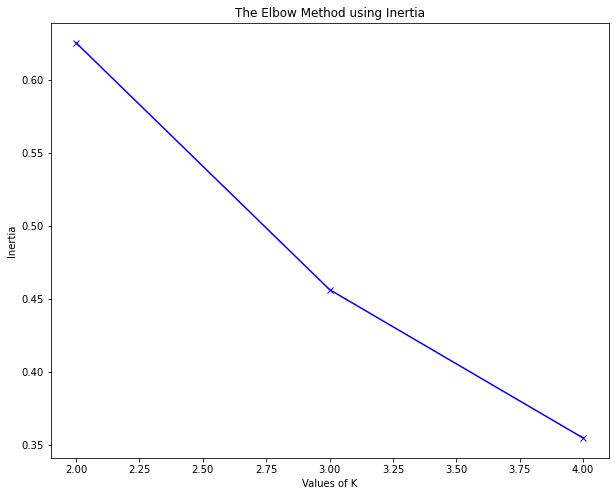

In [31]:
# find 'k' value by Elbow Method
plt.figure(figsize=[10, 8])
inertia=[]
range_val=range(2,5)
for i in range_val:
  kmean=KMeans(n_clusters=i)
  kmean.fit_predict(X)
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [32]:
# create map
map_clusterd = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(abudhabi_merged['Latitude'], abudhabi_merged['Longtitude'],
                                  abudhabi_merged['Boroughs'], abudhabi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[k-1],
        fill=True,
        fill_color=rainbow[k-2],
        fill_opacity=0.7).add_to(map_clusterd)
       
map_clusterd

In [33]:
abudhabi_merged.loc[abudhabi_merged['Cluster Labels'] == 0, abudhabi_merged.columns[[1] + list(range(5, abudhabi_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,25.2239,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
1,25.0897,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
2,24.1924,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
3,24.4667,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
4,24.4329,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
6,25.4136,Café,Restaurant,Cafeteria,Italian Restaurant,Ice Cream Shop,History Museum,Miscellaneous Shop,Gym,Paper / Office Supplies Store,Pool
7,24.2075,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
8,24.5361,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
9,24.3068,Coffee Shop,Hotel,Café,Middle Eastern Restaurant,Restaurant,Asian Restaurant,Burger Joint,Lounge,Indian Restaurant,Sandwich Place
10,25.1852,Café,Coffee Shop,Hotel,Restaurant,Middle Eastern Restaurant,Lounge,Boutique,Italian Restaurant,Nightclub,Gym


In [34]:
abudhabi_merged.loc[abudhabi_merged['Cluster Labels'] == 1, abudhabi_merged.columns[[1] + list(range(5, abudhabi_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,25.4654,Café,Cafeteria,Falafel Restaurant,BBQ Joint,Campground,Restaurant,Rock Climbing Spot,Pharmacy,Paper / Office Supplies Store,Park
12,25.2660,Café,Cafeteria,Harbor / Marina,Camera Store,Falafel Restaurant,Indian Restaurant,Professional & Other Places,Restaurant,Soccer Field,Cruise Ship
17,25.6124,Café,Cafeteria,Falafel Restaurant,BBQ Joint,Campground,Restaurant,Rock Climbing Spot,Pharmacy,Paper / Office Supplies Store,Park
18,25.4565,Café,Cafeteria,Harbor / Marina,Camera Store,Falafel Restaurant,Indian Restaurant,Professional & Other Places,Restaurant,Soccer Field,Cruise Ship
19,25.6841,Café,Cafeteria,Falafel Restaurant,BBQ Joint,Campground,Restaurant,Rock Climbing Spot,Pharmacy,Paper / Office Supplies Store,Park
20,26.0357,Café,Cafeteria,Falafel Restaurant,BBQ Joint,Campground,Restaurant,Rock Climbing Spot,Pharmacy,Paper / Office Supplies Store,Park
29,26.0364,Restaurant,Mountain,Market,South Indian Restaurant,Café,Cafeteria,Falafel Restaurant,Indian Restaurant,Paper / Office Supplies Store,Pet Store
30,24.9089,Café,Cafeteria,Falafel Restaurant,BBQ Joint,Campground,Restaurant,Rock Climbing Spot,Pharmacy,Paper / Office Supplies Store,Park
32,25.7520,Café,Cafeteria,Falafel Restaurant,BBQ Joint,Campground,Restaurant,Rock Climbing Spot,Pharmacy,Paper / Office Supplies Store,Park
43,25.8789,Café,Cafeteria,Falafel Restaurant,BBQ Joint,Campground,Restaurant,Rock Climbing Spot,Pharmacy,Paper / Office Supplies Store,Park


In [35]:
abudhabi_merged.loc[abudhabi_merged['Cluster Labels'] == 2, abudhabi_merged.columns[[1] + list(range(5, abudhabi_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,25.3146,Restaurant,Pet Store,Nail Salon,National Park,Nightclub,North Indian Restaurant,Opera House,Optical Shop,Pakistani Restaurant,Paper / Office Supplies Store
